In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Folder with CSV files
folder_path = "C://Users/nilsa/Desktop/dapr1/csv files"

# Read and merge all CSV files
dataframes = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,41.886692,-87.623561,41.883570,-87.648731,casual
1,A7FB70B4AFC6CAF2,electric_bike,2020-09-17 15:07:31,2020-09-17 15:07:45,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual
2,86057FA01BAC778E,electric_bike,2020-09-17 15:09:04,2020-09-17 15:09:35,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual
3,57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,41.956060,-87.668916,41.963985,-87.638216,casual
4,B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,41.891860,-87.621008,41.891346,-87.620325,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913067,5E5C9CD681E0419C,classic_bike,2021-08-07 18:07:43,2021-08-07 18:21:21,Wells St & Evergreen Ave,TA1308000049,Lincoln Ave & Diversey Pkwy,TA1307000064,41.906724,-87.634830,41.932225,-87.658617,member
4913068,96FB57CF4AA456F6,electric_bike,2021-08-09 08:49:31,2021-08-09 09:03:51,Broadway & Sheridan Rd,13323,Clark St & Lincoln Ave,13179,41.952709,-87.649940,41.915973,-87.634762,member
4913069,226A0910DCCE904C,classic_bike,2021-08-12 16:55:57,2021-08-12 17:15:10,Dearborn St & Adams St,TA1305000005,Clark St & Lincoln Ave,13179,41.879356,-87.629791,41.915689,-87.634600,member
4913070,1A97D27AE23DE1E7,classic_bike,2021-08-08 22:47:43,2021-08-08 23:08:12,Broadway & Sheridan Rd,13323,Clark St & Winnemac Ave,TA1309000035,41.952833,-87.649993,41.973348,-87.667855,casual


In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913072 entries, 0 to 4913071
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 487.3+ MB


In [4]:
combined_df.duplicated().sum()

0

In [5]:
combined_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    450045
start_station_id      450571
end_station_name      491380
end_station_id        491764
start_lat                  0
start_lng                  0
end_lat                 5015
end_lng                 5015
member_casual              0
dtype: int64

In [6]:
combined_df.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [7]:
combined_df.rideable_type.unique()

array(['electric_bike', 'docked_bike', 'classic_bike'], dtype=object)

In [8]:
#Remove unnecessary columns
combined_df = combined_df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])


In [9]:
# remove null values from start_station_id and end_station_id columns
combined_df = combined_df.dropna(subset=['start_station_id', 'end_station_id'], how='all')

In [10]:
# convert datatype from object to datatime for columns `started_at` and `ended_at`
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'], format='%Y-%m-%d %H:%M:%S')
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'], format='%Y-%m-%d %H:%M:%S')

combined_df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
dtype: object

In [11]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,casual
3,57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,casual
4,B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,casual
5,378BBCE1E444EB80,electric_bike,2020-09-17 18:37:04,2020-09-17 19:23:28,Clark St & Armitage Ave,94.0,NaN,NaN,casual
6,0CB5E2496B6F1DF8,electric_bike,2020-09-16 21:39:57,2020-09-16 21:53:44,Wells St & Evergreen Ave,291.0,Broadway & Sheridan Rd,256.0,casual


In [12]:
# `ride_time` calculation (minute cinsinden)
combined_df['ride_time'] = (combined_df['ended_at'] - combined_df['started_at']).dt.total_seconds() / 60

combined_df[['started_at', 'ended_at', 'ride_time']].head()

,started_at,ended_at,ride_time
0,2020-09-17 14:27:11,2020-09-17 14:44:24,17.216667
3,2020-09-17 18:10:46,2020-09-17 18:35:49,25.050000
4,2020-09-17 15:16:13,2020-09-17 15:52:55,36.700000
5,2020-09-17 18:37:04,2020-09-17 19:23:28,46.400000
6,2020-09-16 21:39:57,2020-09-16 21:53:44,13.783333


In [13]:
# Filtering inconsistens rows by condition of le `started_at` >= `ended_at`
df_cleaned = combined_df[combined_df['started_at'] < combined_df['ended_at']]

df_cleaned.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_time
0,2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,casual,17.216667
3,57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,casual,25.050000
4,B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,casual,36.700000
5,378BBCE1E444EB80,electric_bike,2020-09-17 18:37:04,2020-09-17 19:23:28,Clark St & Armitage Ave,94.0,NaN,NaN,casual,46.400000
6,0CB5E2496B6F1DF8,electric_bike,2020-09-16 21:39:57,2020-09-16 21:53:44,Wells St & Evergreen Ave,291.0,Broadway & Sheridan Rd,256.0,casual,13.783333


In [14]:
df_cleaned.ride_time.unique()

array([ 17.21666667,  25.05      ,  36.7       , ..., 296.38333333,
       745.21666667, 736.65      ])

In [15]:
# Delete rows with `ride_time` value less than 1
df_cleaned = df_cleaned[df_cleaned['ride_time'] >= 1]

In [16]:
# Group by 'member_casual' and 'ride_id' columns and calculate the total number of rides for each group
ride_count_by_member = df_cleaned.groupby('member_casual')['ride_id'].nunique().reset_index(name='ride_count')

print("Number of Rides Made by Member and Casual Users:")
ride_count_by_member


Number of Rides Made by Member and Casual Users:


,member_casual,ride_count
0,casual,2068464
1,member,2516438


C:\Users\nilsa\AppData\Local\Temp\ipykernel_12756\1106091421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='member_casual', y='ride_count', data=ride_count_by_member, palette='Set2')


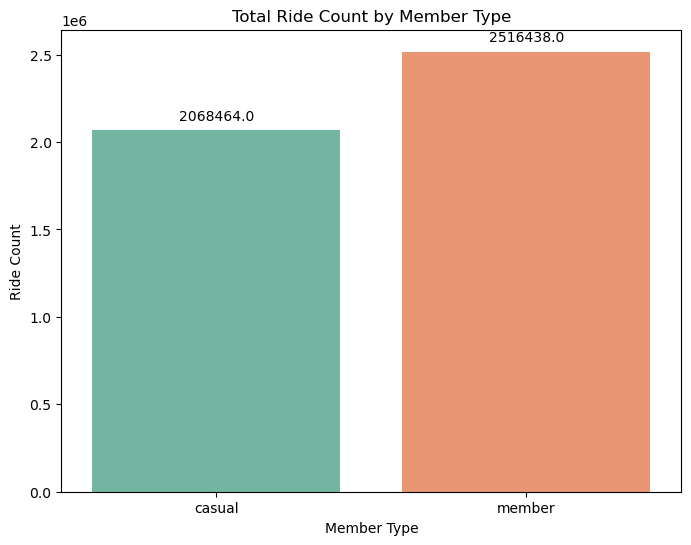

In [17]:
# Using Bar Plot for Visualizing the Number of Rides Made by Member and Casual Users
plt.figure(figsize=(8, 6))
sns.barplot(x='member_casual', y='ride_count', data=ride_count_by_member, palette='Set2')

plt.title('Total Ride Count by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Ride Count')

# Indicating values above bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 10), textcoords='offset points')

plt.show()


In [18]:
# Statistical analysis by `member_casual` groups
descriptive_stats = df_cleaned.groupby('member_casual')['ride_time'].describe()

print("Member ve Casual türleri için temel istatistiksel özet:")
descriptive_stats

Member ve Casual türleri için temel istatistiksel özet:


,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2068464.0,35.510982,296.312416,1.0,10.083333,17.65,32.350000,55944.15
member,2516438.0,14.672129,40.871902,1.0,6.200000,10.50,17.916667,31169.60


In [19]:
# Determining the days of the week
df_cleaned['day_of_week'] = df_cleaned['started_at'].dt.day_name()

In [20]:
#  Average ride_time calculation by `member_casual` and `day_of_week` groups
average_ride_time = df_cleaned.groupby(['member_casual', 'day_of_week'])['ride_time'].mean().reset_index()

# Create a pivot table to analyze results more easily
pivot_table = average_ride_time.pivot(index='day_of_week', columns='member_casual', values='ride_time')

print("Average ride_time for members and casual users by day of the week:")
pivot_table

Average ride_time for members and casual users by day of the week:


member_casual,casual,member
day_of_week,,
Friday,34.016023,14.463394
Monday,35.098075,14.115915
Saturday,38.215740,16.326241
Sunday,40.880875,16.786638
Thursday,30.747591,13.713156
Tuesday,31.484805,13.779510
Wednesday,31.630162,13.852908


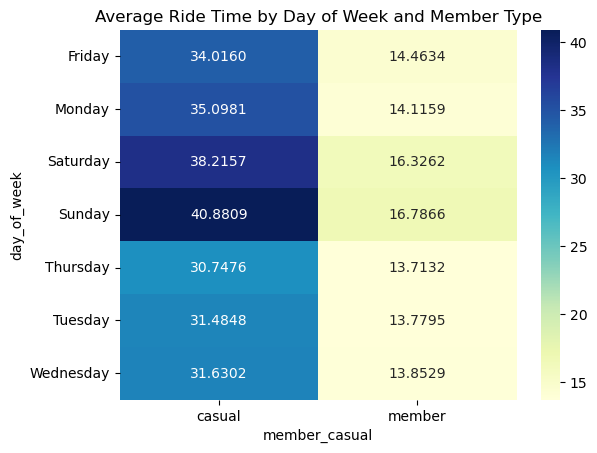

In [21]:
# Heat Map for Average Ride Time by Day of Week and Member Type
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Average Ride Time by Day of Week and Member Type')
plt.show()

In [22]:
# Create a dictionary with numerical equivalents of days
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_cleaned['day_of_week_numeric'] = df_cleaned['day_of_week'].map(day_to_num)

# Create 'weekend' column (0-4: weekdays, 5-6: weekends)
df_cleaned['weekend'] = df_cleaned['day_of_week_numeric'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by 'member_casual' and 'weekend' columns and calculate the number of rides
usage_by_weekend = df_cleaned.groupby(['member_casual', 'weekend']).size().reset_index(name='usage_count')

# Calculating utilization rates
total_usage = df_cleaned.groupby('member_casual').size().reset_index(name='total_usage')
usage_by_weekend = pd.merge(usage_by_weekend, total_usage, on='member_casual')

usage_by_weekend['usage_ratio'] = usage_by_weekend['usage_count'] / usage_by_weekend['total_usage']
# Data Cleaning
df_cleaned = df_cleaned.drop(columns=['day_of_week_numeric'])

usage_by_weekend

,member_casual,weekend,usage_count,total_usage,usage_ratio
0,casual,Weekday,1204114,2068464,0.582130
1,casual,Weekend,864350,2068464,0.417870
2,member,Weekday,1837515,2516438,0.730205
3,member,Weekend,678923,2516438,0.269795


In [23]:
# Group by 'member_casual' and 'weekend' columns and calculate the number of rides
usage_by_weekend = df_cleaned.groupby(['member_casual', 'weekend']).size().reset_index(name='usage_count')

#Calculate rates based on the total number of rides for each 'member_casual' group to calculate ride number rates
total_usage = df_cleaned.groupby('member_casual').size().reset_index(name='total_usage')
usage_by_weekend = pd.merge(usage_by_weekend, total_usage, on='member_casual')

# Calculating Ratio
usage_by_weekend['usage_ratio'] = usage_by_weekend['usage_count'] / usage_by_weekend['total_usage']

# Creating Pivot
pivot_table = usage_by_weekend.pivot(index='member_casual', columns='weekend', values='usage_ratio')

print("Pivot Table:")
pivot_table


Pivot Table:


weekend,Weekday,Weekend
member_casual,,
casual,0.582130,0.417870
member,0.730205,0.269795


In [24]:
# Create a pivot table (with usage_count values)
pivot_table_count = usage_by_weekend.pivot(index='member_casual', columns='weekend', values='usage_count')

print("Pivot Tablo (Kullanım Sayıları):")
pivot_table_count

Pivot Tablo (Kullanım Sayıları):


weekend,Weekday,Weekend
member_casual,,
casual,1204114,864350
member,1837515,678923


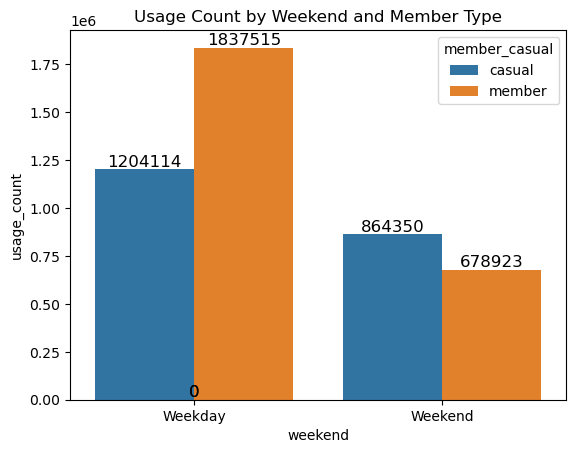

In [25]:
# Create a barplot to visualize the usage count by weekend and member type
ax = sns.barplot(x='weekend', y='usage_count', hue='member_casual', data=usage_by_weekend)

for p in ax.patches:
    ridership_value = p.get_height()  
    
    ridership_display = f'{int(ridership_value)}' 
    
    ax.annotate(ridership_display, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Usage Count by Weekend and Member Type')
plt.show()


In [26]:
# Determine month information
df_cleaned['month'] = df_cleaned['started_at'].dt.month_name()

In [27]:
# Calculate the average ride time grouped by member type and month
average_ride_time_month = df_cleaned.groupby(['member_casual', 'month'])['ride_time'].mean().reset_index()

# Create a pivot table for easier analysis of the results
pivot_table_month = average_ride_time_month.pivot(index='month', columns='member_casual', values='ride_time')

# Reorder the months to ensure they are displayed in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table_month = pivot_table_month.reindex(month_order)

print("Average ride time for members and casual users by month:")
pivot_table_month

Average ride time for members and casual users by month:


member_casual,casual,member
month,,
January,26.888873,13.157656
February,52.315133,18.694256
March,39.218809,14.231509
April,39.240736,14.963740
May,39.857308,14.995709
June,38.865118,14.954273
July,34.038225,14.493985
August,29.714482,14.298371
September,39.017300,15.833537


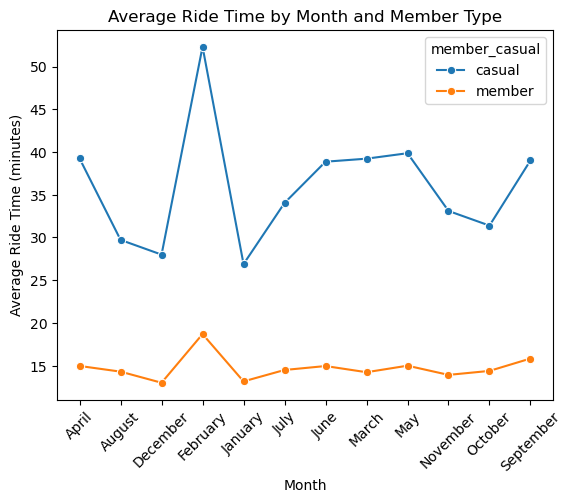

In [28]:
# Create a line plot to visualize the average ride time by month and member type
sns.lineplot(data=average_ride_time_month, x='month', y='ride_time', hue='member_casual', marker='o')
plt.title('Average Ride Time by Month and Member Type')
plt.xlabel('Month') 
plt.ylabel('Average Ride Time (minutes)')  
plt.xticks(rotation=45)  
plt.show()

In [29]:
# Determine hour information
df_cleaned['hour'] = df_cleaned['started_at'].dt.hour

In [30]:
# Calculate the average ride time grouped by member type and hour
average_ride_time_hour = df_cleaned.groupby(['member_casual', 'hour'])['ride_time'].mean().reset_index()

# Create a pivot table for easier analysis of the results
pivot_table_hour = average_ride_time_hour.pivot(index='hour', columns='member_casual', values='ride_time')

print("Average ride time for members and casual users by hour:")
pivot_table_hour

Average ride time for members and casual users by hour:


member_casual,casual,member
hour,,
0,39.195225,14.193234
1,45.007272,16.663821
2,48.214508,16.145790
3,52.784115,17.857920
4,54.448454,13.527029
5,29.072842,12.442266
6,26.762033,12.821732
7,22.472301,12.928419
8,25.174228,13.088631


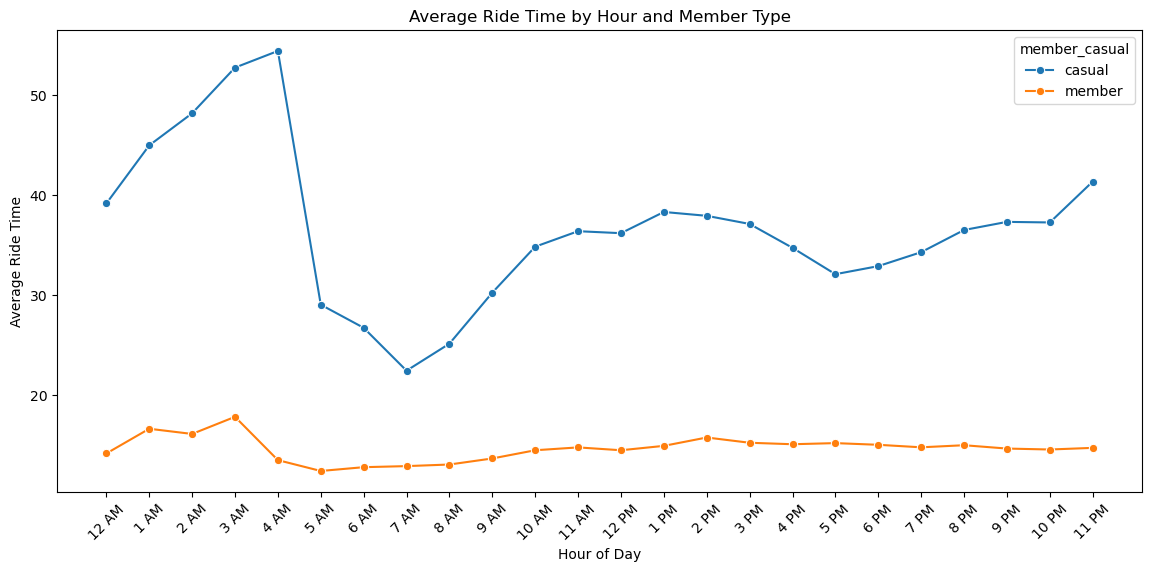

In [31]:
# Function to convert hours to 12-hour format
def format_hour(hour):
    if hour == 0:
        return '12 AM'
    elif hour == 12:
        return '12 PM'
    elif hour < 12:
        return f'{hour} AM'
    else:
        return f'{hour - 12} PM'

plt.figure(figsize=(14, 6))  

# Create a line plot to visualize average ride time by hour and member type
sns.lineplot(data=average_ride_time_hour, x='hour', y='ride_time', hue='member_casual', marker='o')

plt.title('Average Ride Time by Hour and Member Type')
plt.xlabel('Hour of Day')
plt.ylabel('Average Ride Time')

# Format x-axis ticks to display hours in 12-hour format
plt.xticks(ticks=range(0, 24), labels=[format_hour(i) for i in range(24)], rotation=45)

plt.show()

In [32]:
# Create a pivot table to show the total usage count by bike type and user type
pivot_table_sum = df_cleaned.pivot_table(index='rideable_type',
                                 columns='member_casual', 
                                 values='ride_id', 
                                 aggfunc='count', 
                                 fill_value=0)

# Perform statistical analysis by creating a pivot table for the average ride time
pivot_table_mean = df_cleaned.pivot_table(index='rideable_type', 
                                  columns='member_casual', 
                                  values='ride_time', 
                                  aggfunc='mean', 
                                  fill_value=0)

# Print the pivot table showing total usage count
print("Pivot Table for Usage Count (Sum):")
print(pivot_table_sum)

# Print the pivot table showing average ride time
print("\nPivot Table for Average Ride Time (Mean):")
print(pivot_table_sum)

Pivot Table for Usage Count (Sum):
member_casual  casual   member
rideable_type                 
classic_bike   915127  1343305
docked_bike    538486   491021
electric_bike  614851   682112

Pivot Table for Average Ride Time (Mean):
member_casual  casual   member
rideable_type                 
classic_bike   915127  1343305
docked_bike    538486   491021
electric_bike  614851   682112


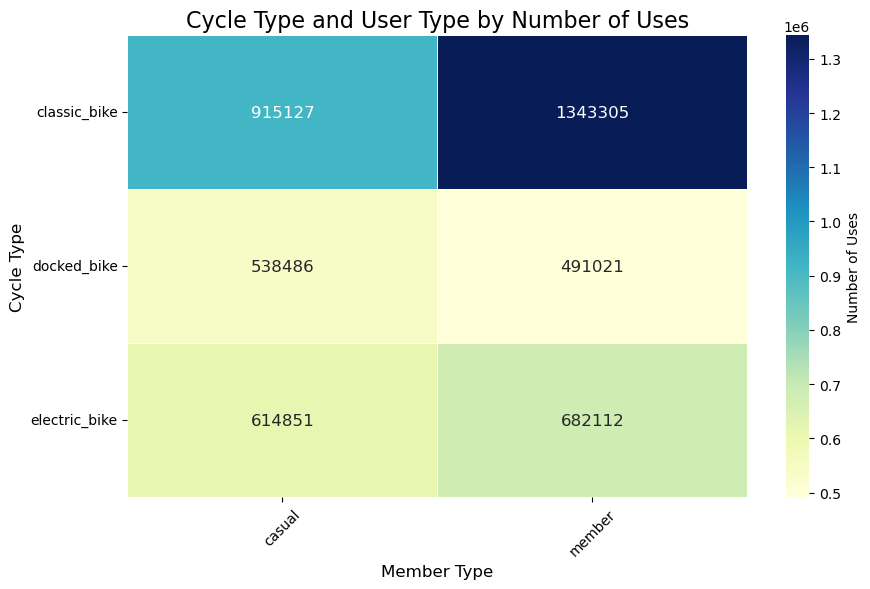

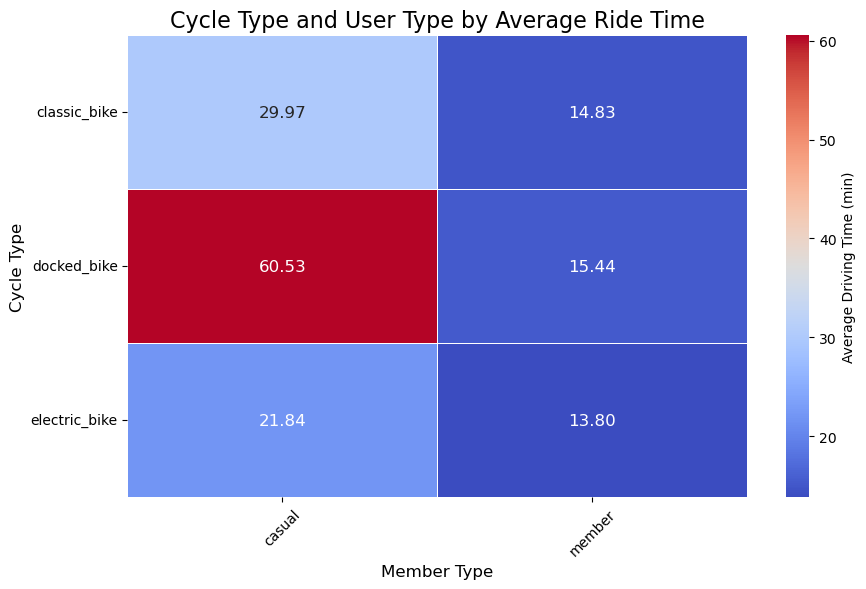

In [33]:
# Visualize the pivot table for usage count as a heatmap
plt.figure(figsize=(10, 6)) 
sns.heatmap(pivot_table_sum, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, 
            annot_kws={"size": 12}, cbar_kws={'label': 'Number of Uses'})
plt.title('Cycle Type and User Type by Number of Uses', fontsize=16)
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Cycle Type', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Visualize the pivot table for average ride time as a heatmap
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlama
sns.heatmap(pivot_table_mean, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5, 
            annot_kws={"size": 12}, cbar_kws={'label': 'Average Driving Time (min)'})
plt.title('Cycle Type and User Type by Average Ride Time', fontsize=16)
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Cycle Type', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [34]:
# Filter out rows with NaN values in 'start_station_name' and 'end_station_name'
df_filtered = df.dropna(subset=['start_station_name', 'end_station_name'])

# Calculate usage counts for each start station
start_station_counts = df_filtered['start_station_name'].value_counts().reset_index()
start_station_counts.columns = ['station_name', 'start_count']

end_station_counts = df_filtered['end_station_name'].value_counts().reset_index()
end_station_counts.columns = ['station_name', 'end_count']

# Calculate total usage count by summing start and end counts
station_counts = pd.merge(start_station_counts, end_station_counts, on='station_name', how='outer').fillna(0)

# Convert 'start_count', 'end_count', and 'total_count' columns to integers
station_counts['total_count'] = station_counts['start_count'] + station_counts['end_count']
# 'start_count', 'end_count' ve 'total_count' sütunlarını tam sayıya dönüştürme
station_counts['start_count'] = station_counts['start_count'].astype(int)
station_counts['end_count'] = station_counts['end_count'].astype(int)
station_counts['total_count'] = station_counts['total_count'].astype(int)
# Print the results sorted by total usage count (descending) and station name (alphabetical)
print("Station Usage Counts (Avoiding NaN Rows):")
station_counts.sort_values(by=['total_count', 'station_name'], ascending=[False, True])


Station Usage Counts (Avoiding NaN Rows):


,station_name,start_count,end_count,total_count
633,Streeter Dr & Grand Ave,14114,14053,28167
231,DuSable Lake Shore Dr & North Blvd,9052,10591,19643
461,Michigan Ave & Oak St,7855,7867,15722
636,Theater on the Lake,6942,6995,13937
675,Wells St & Concord Ln,6645,6595,13240
...,...,...,...,...
719,Woodlawn & 103rd - Olive Harvey Vaccination Site,1,1,2
1,351,1,0,1
316,Harlem Ave & Grace St,1,0,1
353,Kilbourn & Belden,0,1,1


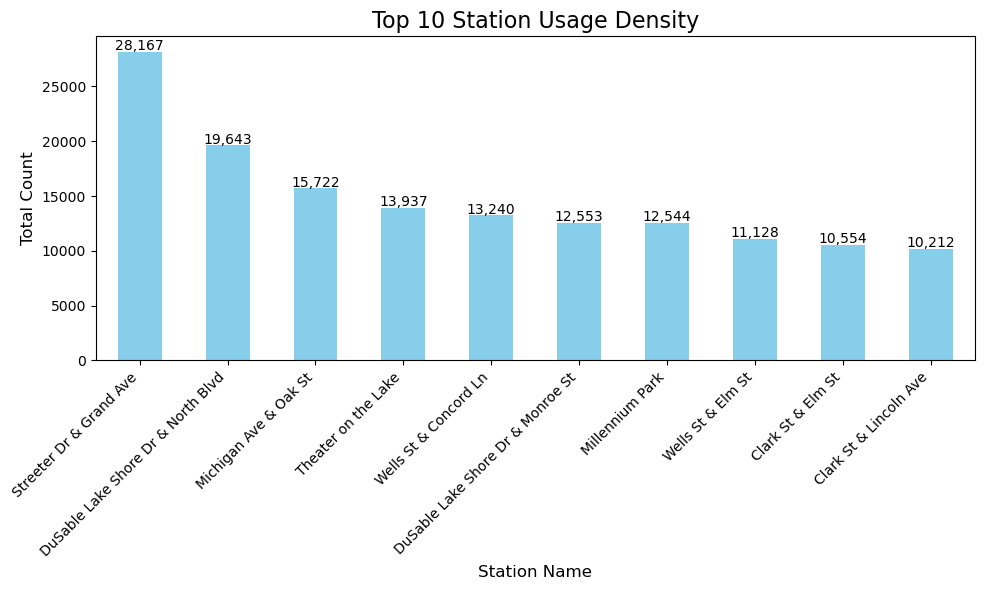

In [35]:
# Select the top 10 stations based on total usage count
top_10_stations = station_counts.sort_values(by='total_count', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6)) 

# Create a bar chart for the top 10 stations
top_10_stations.plot(kind='bar', x='station_name', y='total_count', legend=False, color='skyblue', ax=ax)

ax.set_title('Top 10 Station Usage Density', fontsize=16)
ax.set_xlabel('Station Name', fontsize=12)
ax.set_ylabel('Total Count', fontsize=12)

ax.set_xticklabels(top_10_stations['station_name'], rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',   # Display the value (with thousands separator)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 4), 
                textcoords='offset points',
                ha='center', va='center', fontsize=10, color='black')

plt.tight_layout() # Adjust the layout to prevent elements from overlapping
plt.show()


In [36]:
# Reshape the DataFrame to long format, with each row representing a pair of 'member_casual' and 'station_name'
station_counts_by_member = df_filtered.groupby(['member_casual', 'start_station_name']).size().reset_index(name='usage_count')

# Select the top 10 stations based on the total usage count
top_10_station_member = station_counts_by_member.groupby('start_station_name')['usage_count'].sum().sort_values(ascending=False).head(10).index
# Filter the data to include only the top 10 stations
station_counts_by_member_top10 = station_counts_by_member[station_counts_by_member['start_station_name'].isin(top_10_station_member)]

# Sort the data by usage count (descending order)
station_counts_by_member_top10 = station_counts_by_member_top10.sort_values(by='usage_count', ascending=False)
station_counts_by_member_top10

,member_casual,start_station_name,usage_count
628,casual,Streeter Dr & Grand Ave,11353
230,casual,DuSable Lake Shore Dr & North Blvd,5768
459,casual,Michigan Ave & Oak St,5526
465,casual,Millennium Park,5037
229,casual,DuSable Lake Shore Dr & Monroe St,4903
631,casual,Theater on the Lake,4153
670,casual,Wells St & Concord Ln,3430
940,member,DuSable Lake Shore Dr & North Blvd,3284
1355,member,Wells St & Concord Ln,3215
671,casual,Wells St & Elm St,2935


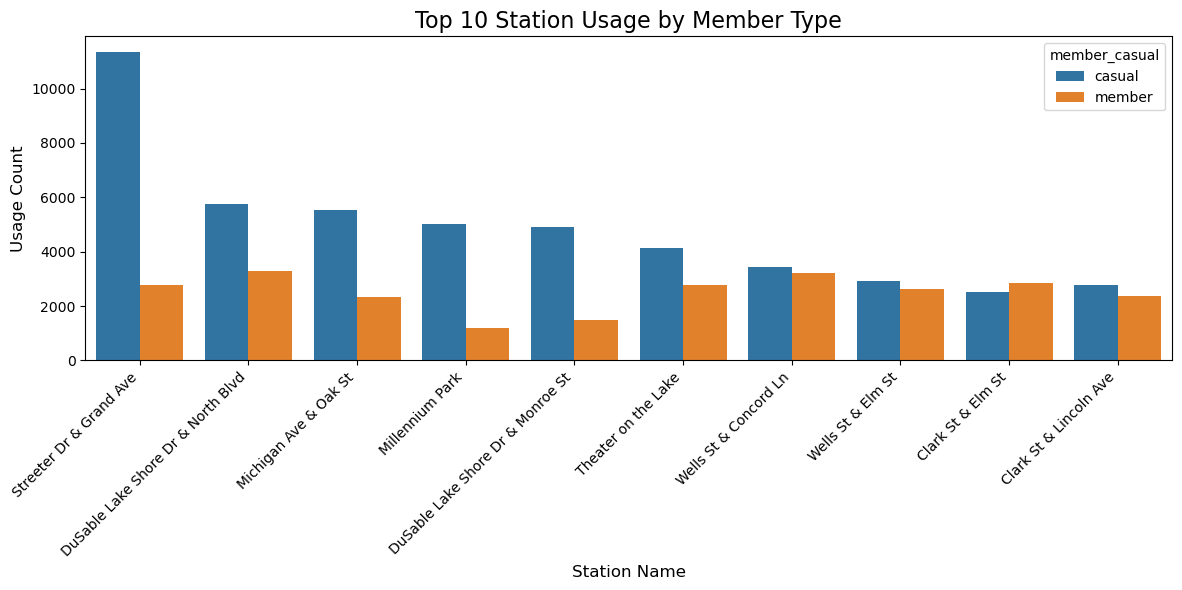

In [37]:
# Create a bar plot for the top 10 stations with usage count by member type
plt.figure(figsize=(12, 6))
sns.barplot(data=station_counts_by_member_top10, x='start_station_name', y='usage_count', hue='member_casual')

plt.title('Top 10 Station Usage by Member Type', fontsize=16)
plt.xlabel('Station Name', fontsize=12)
plt.ylabel('Usage Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [38]:
df_cleaned

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_time,day_of_week,weekend,month,hour
0,2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,casual,17.216667,Thursday,Weekday,September,14
3,57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,casual,25.050000,Thursday,Weekday,September,18
4,B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,casual,36.700000,Thursday,Weekday,September,15
5,378BBCE1E444EB80,electric_bike,2020-09-17 18:37:04,2020-09-17 19:23:28,Clark St & Armitage Ave,94.0,NaN,NaN,casual,46.400000,Thursday,Weekday,September,18
6,0CB5E2496B6F1DF8,electric_bike,2020-09-16 21:39:57,2020-09-16 21:53:44,Wells St & Evergreen Ave,291.0,Broadway & Sheridan Rd,256.0,casual,13.783333,Wednesday,Weekday,September,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913067,5E5C9CD681E0419C,classic_bike,2021-08-07 18:07:43,2021-08-07 18:21:21,Wells St & Evergreen Ave,TA1308000049,Lincoln Ave & Diversey Pkwy,TA1307000064,member,13.633333,Saturday,Weekend,August,18
4913068,96FB57CF4AA456F6,electric_bike,2021-08-09 08:49:31,2021-08-09 09:03:51,Broadway & Sheridan Rd,13323,Clark St & Lincoln Ave,13179,member,14.333333,Monday,Weekday,August,8
4913069,226A0910DCCE904C,classic_bike,2021-08-12 16:55:57,2021-08-12 17:15:10,Dearborn St & Adams St,TA1305000005,Clark St & Lincoln Ave,13179,member,19.216667,Thursday,Weekday,August,16
4913070,1A97D27AE23DE1E7,classic_bike,2021-08-08 22:47:43,2021-08-08 23:08:12,Broadway & Sheridan Rd,13323,Clark St & Winnemac Ave,TA1309000035,casual,20.483333,Sunday,Weekend,August,22


In [39]:
# Save the cleaned DataFrame to a CSV file without including the index column
df_cleaned.to_csv('df_cleaned.csv', index=False)


In [40]:
df_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'ride_time', 'day_of_week',
       'weekend', 'month', 'hour'],
      dtype='object')

In [41]:
df_cleaned.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
ride_time                    float64
day_of_week                   object
weekend                       object
month                         object
hour                           int32
dtype: object